In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/tshan/Downloads/MLE Roles at AI Startups.xlsx"  

# Load the Excel file to check sheet names
excel_file = pd.ExcelFile(file_path)

# Load and combine all sheets into a single DataFrame
all_sheets_data = {sheet_name: excel_file.parse(sheet_name) for sheet_name in excel_file.sheet_names}
combined_df = pd.concat(all_sheets_data.values(), ignore_index=True)

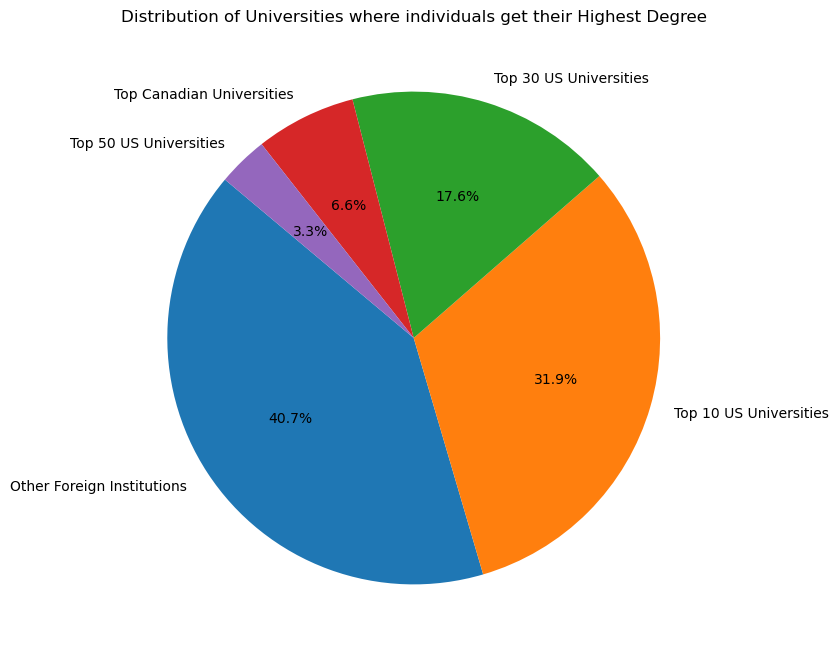

University Category
Other Foreign Institutions    40.659341
Top 10 US Universities        31.868132
Top 30 US Universities        17.582418
Top Canadian Universities      6.593407
Top 50 US Universities         3.296703
Name: proportion, dtype: float64

In [12]:
# Define lists of top US universities by rank
top_10_us = [
    'Princeton University', 'Stanford University', 'MIT', 'Harvard University'
    'Yale University', 'University of Chicago', 'Columbia University',
    'University of Pennsylvania', 'California Institute of Technology',
    'Duke University', 'Johns Hopkins University'
]

top_30_us = top_10_us + [
    'Northwestern University', 'Dartmouth College', 'Brown University',
    'Vanderbilt University', 'Rice University', 'Washington University in St. Louis',
    'Cornell University', 'University of Notre Dame', 'University of California, Berkeley',
    'Emory University', 'Georgetown University', 'University of Michigan, Ann Arbor',
    'University of Southern California', 'Carnegie Mellon University',
    'University of Virginia', 'Wake Forest University', 'University of North Carolina, Chapel Hill',
    'New York University', 'Tufts University', 'UCLA'
]

top_50_us = top_30_us + [
    'University of Rochester', 'Boston College', 'University of Wisconsin-Madison',
    'University of Texas, Austin', 'UC Irvine','University of Illinois Urbana-Champaign',
    'Pennsylvania State University', 'University of Washington', 'University of Florida',
    'Syracuse University', 'Ohio State University', 'Purdue University',
    'University of Connecticut', 'University of Georgia', 'University of Maryland, College Park',
    'Clemson University', 'University of Pittsburgh', 'Rutgers University',
    'University of Minnesota, Twin Cities', 'Texas A&M University', 'Indiana University, Bloomington'
]

top_canadian_universities = [
    'University of Toronto', 'University of Waterloo'
]

top_chinese_universities = [
    'Tsinghua University', 'Peking University', 'Fudan University',
    'Shanghai Jiao Tong University', 'Zhejiang University', 'Tongji University','University of Science and Technology of China', 
    'Nanjing University','Sun Yat-sen University', 'Huazhong University of Science and Technology',
    'Tongji University', 'Xiamen University'
]

# Function to categorize universities
def categorize_university(school):
    if school in top_10_us:
        return 'Top 10 US Universities'
    elif school in top_30_us:
        return 'Top 30 US Universities'
    elif school in top_50_us:
        return 'Top 50 US Universities'
    elif school in top_canadian_universities:
        return 'Top Canadian Universities'
    elif school in top_chinese_universities:
        return 'Top Chinese Universities'
    else:
        return 'Other Foreign Institutions'

# Apply categorization to the DataFrame
combined_df['University Category'] = combined_df['School of Highest Degree'].apply(categorize_university)

# Calculate the percentage of each category
category_percentages = combined_df['University Category'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
category_percentages.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Universities where individuals get their Highest Degree')
plt.ylabel('')  # Hide y-label
plt.show()

category_percentages



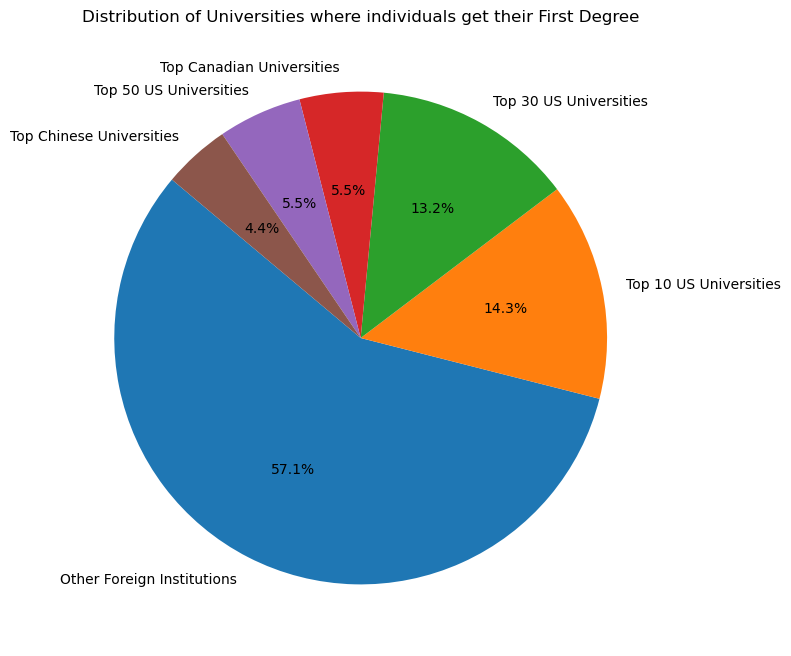

University Category
Other Foreign Institutions    57.142857
Top 10 US Universities        14.285714
Top 30 US Universities        13.186813
Top Canadian Universities      5.494505
Top 50 US Universities         5.494505
Top Chinese Universities       4.395604
Name: proportion, dtype: float64

In [13]:
# Apply categorization to the DataFrame
combined_df['University Category'] = combined_df['School of First Degree'].apply(categorize_university)

# Calculate the percentage of each category
category_percentages = combined_df['University Category'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
category_percentages.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Universities where individuals get their First Degree')
plt.ylabel('')  # Hide y-label
plt.show()

category_percentages

In [ ]:
# Define a function to split majors into "First Degree" and "Highest Degree"
def split_majors(major_entry):
    if ',' in str(major_entry):  # Check if entry contains a comma (indicating two majors)
        first_major, highest_major = map(str.strip, major_entry.split(',', 1))
        return first_major, highest_major
    else:  # If no comma, use the same major for both columns
        return major_entry, major_entry

# Apply the function and create new columns
combined_df[['Major in First Degree', 'Major in Highest Degree']] = combined_df['Major/Concentration'].apply(
    lambda x: pd.Series(split_majors(x))
)

# Display the first few rows of the updated DataFrame
print(combined_df[['Major/Concentration', 'Major in First Degree', 'Major in Highest Degree']].head())

                                 Major/Concentration Major in First Degree  \
0                               Computer Engineering  Computer Engineering   
1                                   Computer Science      Computer Science   
2                                   Computer Science      Computer Science   
3                                   Computer Science      Computer Science   
4  Engineering Science, AI/ML Applied to Digital ...   Engineering Science   

               Major in Highest Degree  
0                 Computer Engineering  
1                     Computer Science  
2                     Computer Science  
3                     Computer Science  
4  AI/ML Applied to Digital Healthcare  


In [28]:
# Check if 'Major in First Degree' contains "Computer Science", "computer science", or "EECS"
contains_computer_science = combined_df['Major in First Degree'].str.contains(
    'Computer Science|computer science|EECS|Machine Learning|AI|Artificial Intelligence', case=False, na=False
)

# Calculate the percentage of individuals whose first degree major matches the criteria
percentage_computer_science = contains_computer_science.mean() * 100

percentage_computer_science


64.83516483516483

In [29]:
# Check if either 'Major in First Degree' or 'Major in Highest Degree' contains the specified strings
contains_computer_science_either = combined_df[['Major in First Degree', 'Major in Highest Degree']].apply(
    lambda x: x.str.contains('Computer Science|computer science|EECS|Machine Learning|AI|Artificial Intelligence', case=False, na=False)
).any(axis=1)

# Calculate the percentage of individuals whose first or highest degree major matches the criteria
percentage_computer_science_either = contains_computer_science_either.mean() * 100

percentage_computer_science_either


74.72527472527473

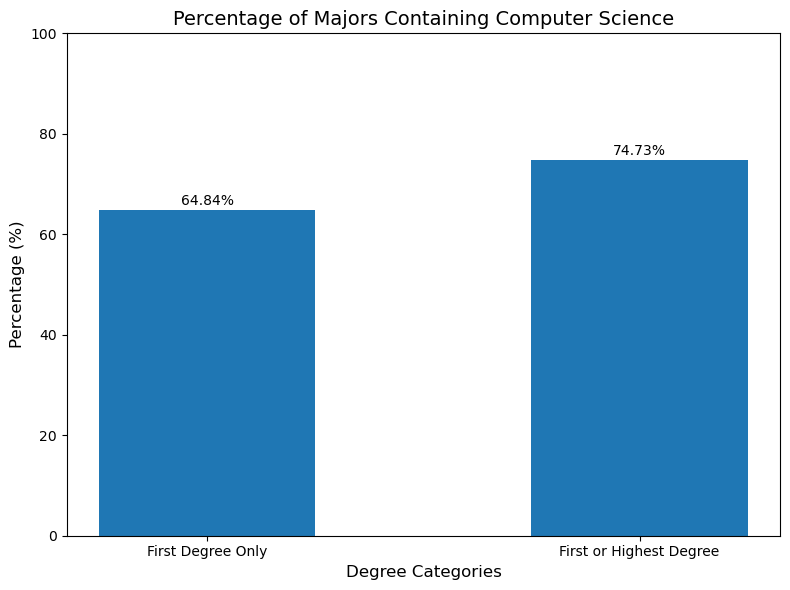

In [31]:
import matplotlib.pyplot as plt

# Data for visualization
percentages = {
    'First Degree Only': contains_computer_science.mean() * 100,
    'First or Highest Degree': contains_computer_science_either.mean() * 100
}

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(percentages.keys(), percentages.values(), width=0.5)

# Add labels and title
plt.title('Percentage of Majors Containing Computer Science', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Degree Categories', fontsize=12)
plt.ylim(0, 100)

# Annotate the bars with the percentage values
for i, (label, value) in enumerate(percentages.items()):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


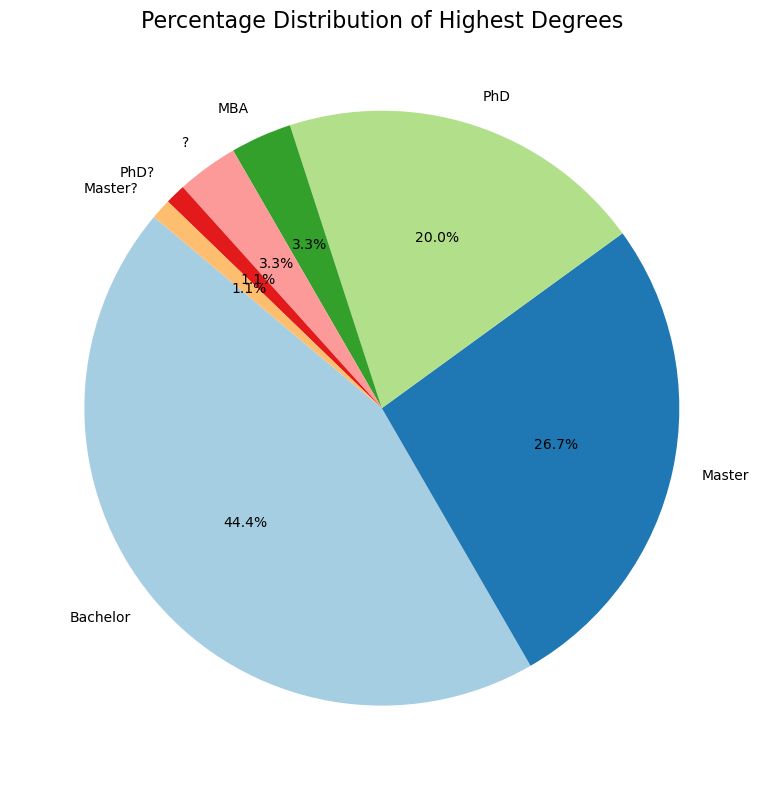

In [32]:
# Count the occurrences of each highest degree
degree_counts = combined_df['Highest Degree'].value_counts()

# Calculate percentages for each degree
degree_percentages = (degree_counts / degree_counts.sum()) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
degree_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Highest Degrees', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

In [33]:
# Split the 'Experience (Company)' column by commas and explode the DataFrame to separate rows for each company
companies_series = combined_df['Experience (Company)'].dropna().str.split(',').explode()

# Strip any extra spaces and count the occurrences of each company
company_counts = companies_series.str.strip().value_counts()

# Display the most frequent companies
company_counts.head(10)

Experience (Company)
Google       16
Facebook     10
Apple         7
Microsoft     7
NVIDIA        6
Meta          6
Twitter       4
Amazon        4
Plaid         3
IBM           3
Name: count, dtype: int64

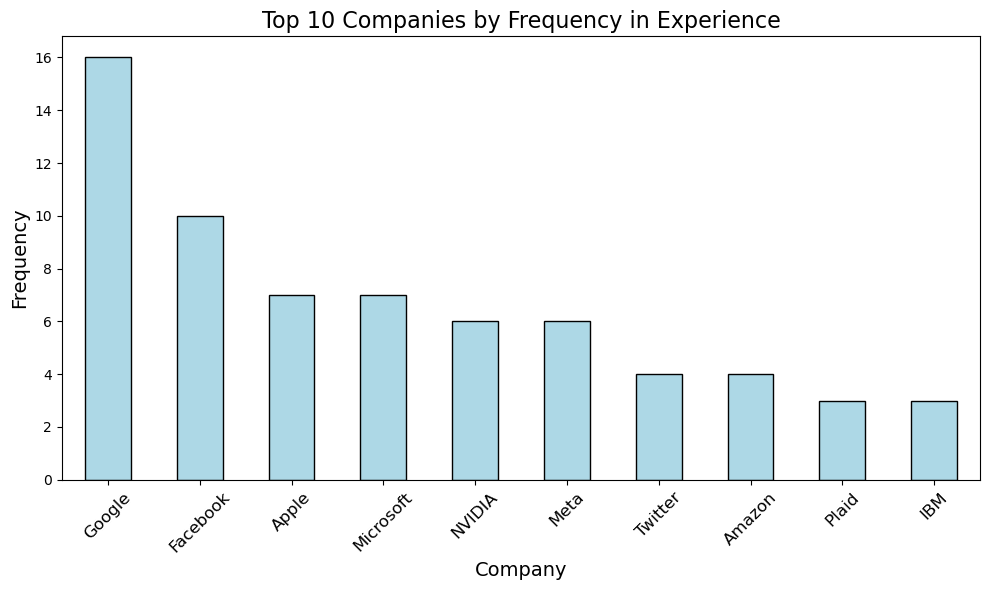

Experience (Company)
Google       4.00
Facebook     2.50
Apple        1.75
Microsoft    1.75
NVIDIA       1.50
Meta         1.50
Twitter      1.00
Amazon       1.00
Plaid        0.75
IBM          0.75
Name: count, dtype: float64

In [35]:
# Visualization of the top companies
top_companies = company_counts.head(10)

# Bar chart for top companies
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Companies by Frequency in Experience', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Deeper analysis: Display percentage representation of the top companies
top_companies_percentage = (top_companies / companies_series.size) * 100
top_companies_percentage.sort_values(ascending=False)

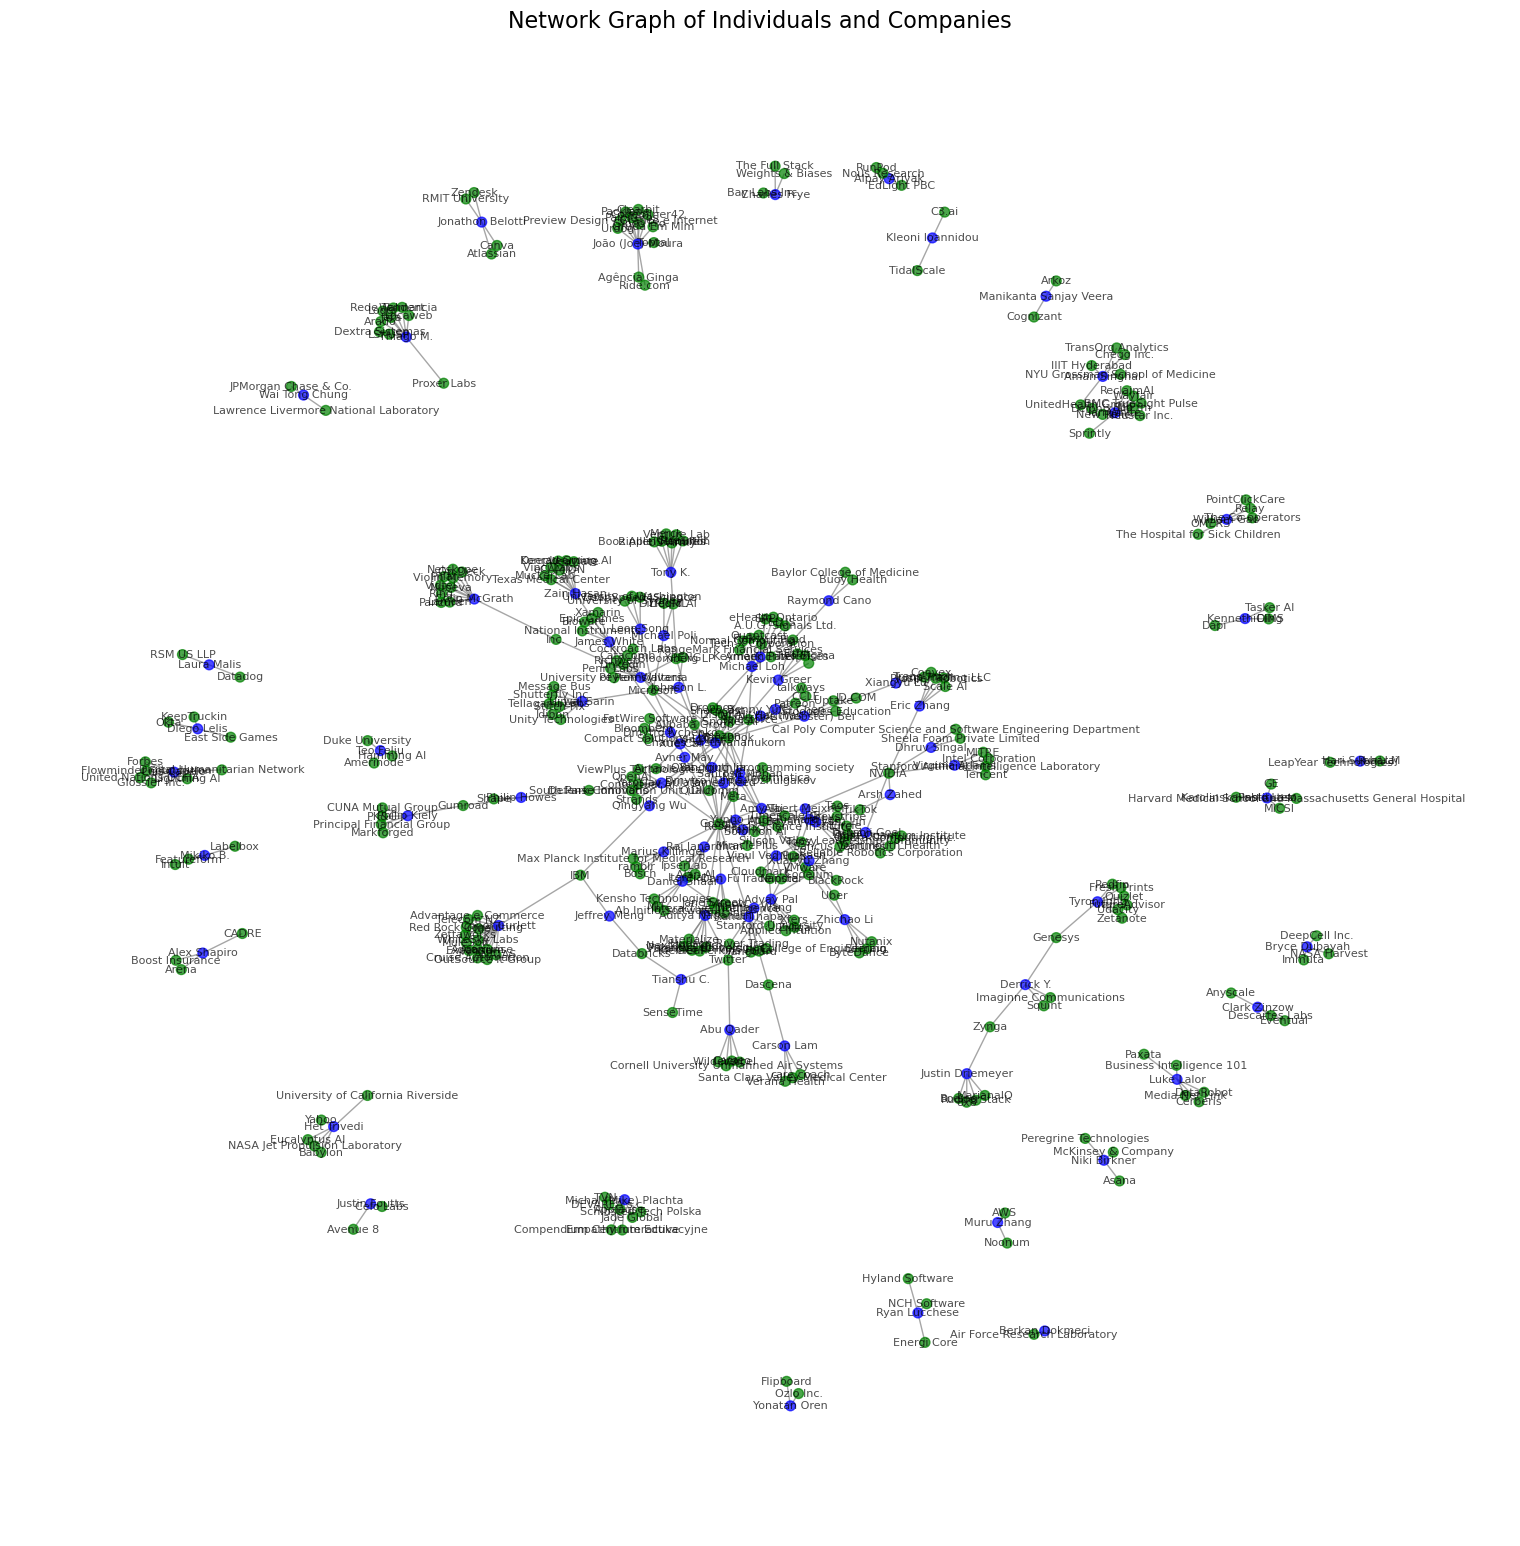

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges based on individual names and their associated companies
for _, row in combined_df.dropna(subset=['Name', 'Experience (Company)']).iterrows():
    individual = row['Name']
    companies = row['Experience (Company)'].split(',')
    for company in companies:
        company = company.strip()
        G.add_node(individual, type='individual')
        G.add_node(company, type='company')
        G.add_edge(individual, company)

# Set node colors: individuals (blue) and companies (green)
node_colors = ['blue' if G.nodes[node]['type'] == 'individual' else 'green' for node in G]

# Draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)  # Layout for the graph
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=50,
    font_size=8,
    node_color=node_colors,
    edge_color='gray',
    alpha=0.7
)
plt.title('Network Graph of Individuals and Companies', fontsize=16)
plt.show()


In [43]:
# Get all unique company names
unique_companies = companies_series.str.strip().unique()

# Convert to a sorted list for better readability
unique_companies_list = sorted(unique_companies)

# Display the list
unique_companies_list


['',
 '8x8',
 'A.U.G. Signals Ltd.',
 'ANATAS',
 'AWS',
 'Ab Initio Software',
 'Advantage e-Commerce',
 'Agência Ginga',
 'Air Force Research Laboratory',
 'Airtable',
 'Alan AI',
 'Alibaba Group',
 'Amazon',
 'Amerinode',
 'Anyscale',
 'Applause',
 'Apple',
 'Applied Intuition',
 'Aquarium',
 'Arado',
 'Arena',
 'Arkoz',
 'Asana',
 'Atlassian',
 'Atomwise',
 'Avenue 8',
 'BMC TrueSight Pulse',
 'Babylon',
 'Bay Labs Inc.',
 'Baylor College of Medicine',
 'Bioware',
 'Bitmain',
 'BlackRock',
 'Blip.fm',
 'Bloomberg',
 'Bloomberg LP',
 'Boeing',
 'Boost Insurance',
 'Booz Allen Hamilton',
 'Bosch',
 'Buoy Health',
 'Business Intelligence 101',
 'ByteDance',
 'C3.ai',
 'CADRE',
 'CCLE',
 'CUNA Mutual Group',
 'Cal Poly Computer Science and Software Engineering Department',
 'Cameo',
 'Canva',
 'Catacomb',
 'Celo Labs',
 'Cerberis',
 'Chegg Inc.',
 'Circle',
 'Clearbit',
 'Cloudmark',
 'Clue',
 'Cockroach Labs',
 'Codeium',
 'Codeminer42',
 'Cognizant',
 'Compact Solutions LLC',
 'Compen

In [49]:
# Normalize by trimming spaces only, keeping the original case
normalized_companies_series = companies_series.str.strip()

# Count occurrences of each company name and sort by frequency
sorted_companies_by_frequency_original_case = normalized_companies_series.value_counts()


# Convert the sorted frequency data into a DataFrame
sorted_companies_df = sorted_companies_by_frequency_original_case.reset_index()

# Rename the columns for clarity
sorted_companies_df.columns = ['Company Name', 'Frequency']

# Display the DataFrame to the user
import ace_tools as tools; tools.display_dataframe_to_user(name="Sorted Companies by Frequency", dataframe=sorted_companies_df)



ModuleNotFoundError: No module named 'ace_tools'